In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

from sklearn.feature_selection import VarianceThreshold


In [2]:
df = pd.read_csv('data_sources//combined_data.csv', converters={'county_fips': lambda x: str(x)})

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 500)


## Find header columns

In [4]:
keep_cols = [#'county', 'county_ascii', 
       'county_fips', 
       #'state_id', 'state_name',
       #'city_largest', 'city_largest_id', 
       #'lat', 'lng', 
       'population',
       'density', 
       #'timezone', 'timezone_all', 
       'age_median', 
       'age_under_10', 
       'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 
       'male', 'female', 
       'married', 'divorced', 'never_married', 'widowed', 
       'family_size', 'family_dual_income',
       'income_household_median', 
       'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       #'income_household_six_figure', 
       'income_individual_median',
       'home_ownership', 'home_value', 'rent_median', 
       #'rent_burden', # dropped due to 13 NaNs
       'education_less_highschool', 'education_highschool',
       #'education_some_college', 'education_bachelors', 
       'education_graduate',
       'education_college_or_above', 
       #'education_stem_degree',
       'labor_force_participation', 
       #'labor_force', 
       #'labor_force_average', 
       'unemployment_rate', 
       #'unemployment_rate_average', 
       #'bls_date',
       'race_white', 'race_black', 'race_asian', 'race_native', 'race_pacific',
       'race_other', 'race_multiple', 'hispanic', 'disabled', 'poverty',
       'limited_english', 'commute_time', 'health_uninsured', 'veteran',
       #'zips', 
       'total_precip_mm', 'num_precip_days',
       'num_precip_days_greater_1mm', 
       '0.05_percentile_high',
       '0.25_percentile_high', '0.50_percentile_high', '0.75_percentile_high',
       '0.95_percentile_high', 
       'min_high', 'max_high',
       'crime_rate_per_100000_x', 
       #'crime_rate_per_100000_y'
       ]

In [5]:
df = df[keep_cols]

In [6]:
# remove States and extra FIPs
df[df.isna().any(axis=1)]


df.isna().sum()

county_fips                    0
population                     2
density                        2
age_median                     2
age_under_10                   2
age_10_to_19                   2
age_20s                        2
age_30s                        2
age_40s                        2
age_50s                        2
age_60s                        2
age_70s                        2
age_over_80                    2
male                           2
female                         2
married                        2
divorced                       2
never_married                  2
widowed                        2
family_size                    2
family_dual_income             2
income_household_median        2
income_household_under_5       2
income_household_5_to_10       2
income_household_10_to_15      2
income_household_15_to_20      2
income_household_20_to_25      2
income_household_25_to_35      2
income_household_35_to_50      2
income_household_50_to_75      2
income_hou

In [10]:
#drop 46113 and 02270
df.drop(df[df['county_fips'] == '46113'].index, inplace = True)
df.drop(df[df['county_fips'] == '02270'].index, inplace = True)


In [11]:
cols_with_nans = [
    'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
    'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
    'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size',
    'family_dual_income', 
    'income_household_median',
    'income_household_under_5',
    'income_household_5_to_10',
    'income_household_10_to_15',
    'income_household_15_to_20',
    'income_household_20_to_25',
    'income_household_25_to_35',
    'income_household_35_to_50',
    'income_household_50_to_75',
    'income_household_75_to_100',
    'income_household_100_to_150',
    'income_household_150_over',
    'income_individual_median',
    'home_ownership',
    'home_value',
    'rent_median',
    'education_less_highschool',
    'education_highschool',
    'education_graduate',
    'education_college_or_above',
    'labor_force_participation',
    'unemployment_rate',
    'race_white',
    'race_black',
    'race_asian',
    'race_native',
    'race_pacific',
    'race_other',
    'race_multiple',
    'hispanic',
    'disabled',
    'poverty',
    'limited_english',
    'commute_time',
    'health_uninsured',
    'veteran'
    ]

In [12]:
# replace NaNs with data-wide 

for vector in cols_with_nans:

    # code for data-wide mean grabbing as opposed to neighborhood specific
    mean = df[vector].astype("float").mean(axis=0)
    df[vector].replace(np.nan, mean, inplace = True)

In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_individual_median,home_ownership,home_value,rent_median,education_less_highschool,education_highschool,education_graduate,education_college_or_above,labor_force_participation,unemployment_rate,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,total_precip_mm,num_precip_days,num_precip_days_greater_1mm,0.05_percentile_high,0.25_percentile_high,0.50_percentile_high,0.75_percentile_high,0.95_percentile_high,min_high,max_high,crime_rate_per_100000_x
population,1.000000,0.302410,-0.182151,0.046952,0.023088,0.180094,0.266927,0.188241,-0.096532,-0.215811,-0.208337,-0.170831,-0.122684,0.122678,-0.172736,-0.090528,0.274706,-0.234597,0.182819,0.135377,0.288490,-0.023539,-0.119986,-0.182275,-0.185383,-0.185650,-0.227736,-0.231688,-0.163184,0.010729,0.199516,0.386998,0.247328,-0.298394,0.383383,0.460340,-0.030291,-0.321424,0.332915,0.335779,0.198398,0.031358,-0.240155,0.120837,0.460867,-0.049832,0.036550,0.228314,0.139802,0.199705,-0.240008,-0.076061,0.275458,0.186282,-0.040427,-0.187999,0.131253,0.104216,0.108009,0.172942,0.126999,0.105935,0.081091,0.079817,0.148496,0.170097,0.235414
density,0.302410,1.000000,-0.093649,-0.024050,-0.066042,0.135864,0.217502,0.089113,-0.062920,-0.113771,-0.107048,-0.072144,-0.085842,0.085839,-0.154693,-0.066079,0.215039,-0.118613,0.057324,0.075532,0.179055,0.015303,-0.027691,-0.066349,-0.091264,-0.107445,-0.139864,-0.164145,-0.144248,-0.035621,0.083953,0.264289,0.208300,-0.278521,0.341826,0.288344,-0.019989,-0.185505,0.270705,0.245795,0.117674,0.013910,-0.170630,0.106570,0.308413,-0.030488,0.003919,0.118584,0.075920,0.066542,-0.122322,-0.022533,0.165235,0.132916,-0.045192,-0.142782,0.022276,0.041454,0.043200,0.046507,0.026209,0.012187,-0.008455,-0.000649,0.075448,-0.000231,0.166825
age_median,-0.182151,-0.093649,1.000000,-0.647464,-0.684793,-0.745307,-0.602443,-0.165611,0.646694,0.879574,0.854256,0.670437,-0.030805,0.030803,0.403189,0.224507,-0.645946,0.545278,-0.558181,-0.281677,-0.156136,-0.162754,-0.031850,0.138126,0.176103,0.155643,0.197888,0.203536,0.116990,-0.072924,-0.189194,-0.181835,-0.058241,0.552347,-0.077253,-0.251898,-0.177222,0.270130,-0.178865,-0.167770,-0.393808,-0.135268,0.355233,-0.181586,-0.231554,-0.171256,0.001297,-0.240131,-0.156970,-0.305256,0.411640,-0.202359,-0.331266,0.109723,-0.225230,0.427125,-0.152412,-0.060774,-0.067546,-0.104605,-0.128542,-0.162804,-0.176995,-0.169006,-0.086777,-0.165860,-0.247263
age_under_10,0.046952,-0.024050,-0.647464,1.000000,0.479688,0.139361,0.335647,-0.008916,-0.481238,-0.576827,-0.551974,-0.351004,-0.102821,0.102824,0.039503,-0.220375,0.110028,-0.216554,0.529904,0.222750,0.071037,0.033109,-0.021854,-0.103584,-0.112204,-0.082939,-0.070385,-0.039018,0.026402,0.094485,0.102236,0.025261,0.074797,-0.213307,-0.110834,0.000324,0.220156,-0.074602,-0.181881,-0.120701,0.367509,0.041903,-0.204831,0.005904,0.017734,0.279484,-0.040800,0.217036,0.060525,0.289714,-0.298415,0.099493,0.325208,-0.184675,0.333730,-0.261857,0.050168,-0.047345,-0.045381,-0.040302,0.005872,0.081281,0.146887,0.168717,-0.066983,0.203511,0.109592
age_10_to_19,0.023088,-0.066042,-0.684793,0.479688,1.000000,0.304585,0.116963,0.058177,-0.450209,-0.607629,-0.550268,-0.413323,-0.146040,0.146040,-0.124369,-0.277918,0.325788,-0.318094,0.518848,0.216888,0.082072,0.108853,-0.005232,-0.086521,-0.125983,-0.085146,-0.094299,-0.093543,-0.027814,0.059029,0.104035,0.074776,-0.037469,-0.17

<AxesSubplot:>

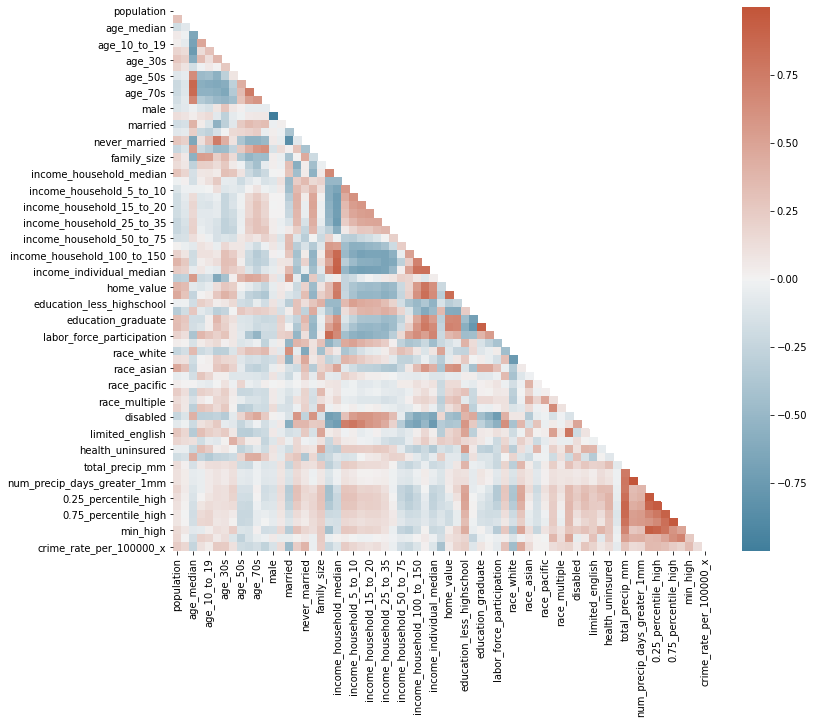

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=False, mask = mask, cmap=cmap)
#plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

<AxesSubplot:>

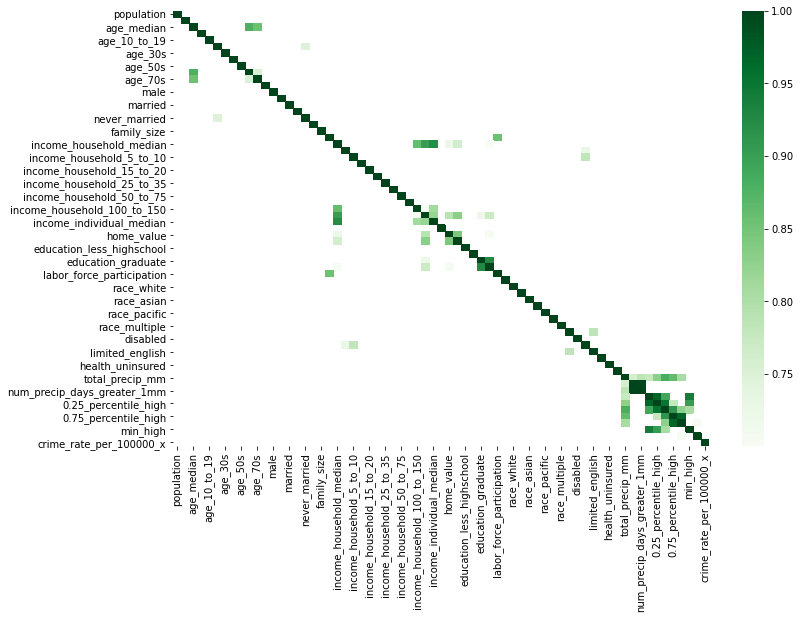

In [15]:
corr = df.corr()

kot = corr[corr>=.7]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

## Check variance

<AxesSubplot:>

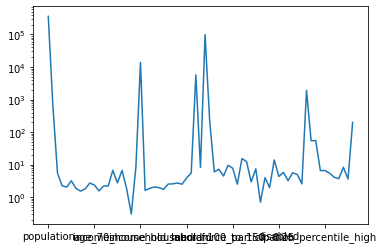

In [16]:
#df.var(axis=0)
df.std(axis=0).plot(logy=True)


In [17]:
column_order = df.std().sort_values(ascending=False).index

column_order

Index(['population', 'home_value', 'income_household_median',
       'income_individual_median', 'total_precip_mm', 'density', 'rent_median',
       'crime_rate_per_100000_x', 'num_precip_days_greater_1mm',
       'num_precip_days', 'race_white', 'hispanic', 'race_black',
       'education_college_or_above', 'family_dual_income', 'min_high',
       'home_ownership', 'labor_force_participation', 'race_native',
       'education_highschool', 'married', 'never_married',
       '0.25_percentile_high', '0.05_percentile_high',
       'education_less_highschool', 'poverty', 'commute_time',
       'income_household_150_over', 'age_median', '0.50_percentile_high',
       'health_uninsured', 'education_graduate', 'disabled',
       '0.75_percentile_high', 'race_other', 'income_household_100_to_150',
       '0.95_percentile_high', 'max_high', 'limited_english', 'age_20s',
       'race_asian', 'divorced', 'income_household_50_to_75', 'age_60s',
       'income_household_35_to_50', 'veteran', 'incom

In [18]:
#df[column_order].std()
df.describe()

,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_individual_median,home_ownership,home_value,rent_median,education_less_highschool,education_highschool,education_graduate,education_college_or_above,labor_force_participation,unemployment_rate,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,total_precip_mm,num_precip_days,num_precip_days_greater_1mm,0.05_percentile_high,0.25_percentile_high,0.50_percentile_high,0.75_percentile_high,0.95_percentile_high,min_high,max_high,crime_rate_per_100000_x
count,2.559000e+03,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2.559000e+03,2559.000000,2559.00000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000
mean,1.169457e+05,98.422782,41.491364,11.939195,12.812114,12.152403,11.724853,11.617429,13.775107,13.187730,8.158187,4.635717,50.101211,49.898828,51.660219,13.502306,27.787300,7.049160,3.070137,49.820086,54146.783509,3.209926,3.512192,5.355061,5.429347,5.452013,10.606995,14.027433,18.554045,12.670340,12.894998,8.284955,27992.307933,71.380422,1.581840e+05,783.535603,12.47120,33.674287,7.930207,22.652130,58.942165,5.129035,84.211411,7.481868,1.480774,1.992302,0.111098,2.194412,2.525909,9.929699,15.738140,14.597538,1.932669,23.333099,9.398359,8.748105,6467.899179,325.229777,322.059007,3.015123,10.930989,19.044939,27.269402,31.005119,-6.231497,36.619422,240.254260
std,3.599965e+05,651.699248,5.531059,2.259720,2.061314,3.209154,1.881578,1.544445,1.806206,2.732117,2.382509,1.566126,2.217847,2.217860,6.734379,2.760399,6.699503,1.823315,0.306282,8.410157,13770.563734,1.626828,1.879046,2.071250,1.986117,1.748761,2.542098,2.588872,2.743563,2.518628,3.929536,5.554912,5702.869851,8.226559,9.826755e+04,227.913039,6.04396,7.228974,4.484475,9.577739,7.794351,2.522723,15.463208,12.455319,2.969830,7.452295,0.710665,3.988764,1.970568,14.000446,4.364516,5.800926,3.232984,5.664096,4.997671,2.581795,1923.810997,54.392066,55.118694,6.576101,6.645326,5.490246,4.126265,3.716176,8.359681,3.623725,198.456853
min,6.600000e+01,0.010000,22.300000,1.500000,4.500000,2.600000,3.200000,4.500000,5.800000,4.700000,2.300000,0.600000,43.900000,27.300000,21.200000,3.200000,9.700000,0.800000,2.230000,14.300000,24145.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,6.600000,1.300000,0.000000,0.000000,8641.000000,0.000000,2.773800e+04,313.000000,1.10000,7.800000,0.700000,1.100000,15.400000,0.000000,8.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.600000,0.000000,5.100000,0.000000,0.000000,-1928.000000,2.000000,2.000000,-32.800000,-16.400000,-3.300000,0.000000,1.100000,-48.300000,2.800000,0.000000
25%,1.165300e+04,5.630000,38.100000,10.500000,11.600000,10.300000,10.600000,10.700000,12.800000,11.500000,6.600000,3.600000,48.900000,49.300000,47.650000,11.800000,2

In [19]:
import pandas as pd
import scipy as sp
import numpy as np

In [20]:
df.head()

,county_fips,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_individual_median,home_ownership,home_value,rent_median,education_less_highschool,education_highschool,education_graduate,education_college_or_above,labor_force_participation,unemployment_rate,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,total_precip_mm,num_precip_days,num_precip_days_greater_1mm,0.05_percentile_high,0.25_percentile_high,0.50_percentile_high,0.75_percentile_high,0.95_percentile_high,min_high,max_high,crime_rate_per_100000_x
0,05035,48672.0,30.79,35.2,15.4,14.2,13.5,12.8,11.4,12.4,11.4,5.5,3.1,47.6,52.4,39.1,17.7,35.9,7.3,3.18,43.3,40161.0,3.6,4.5,6.8,8.9,7.8,12.8,13.6,15.9,10.7,10.6,4.9,23938.0,57.4,110340.000000,732.0,17.4,34.8,5.5,17.4,61.5,8.8,43.5,48.0,0.7,0.3,0.0,0.4,7.1,2.6,16.8,22.2,1.0,20.3,8.4,6.6,7692.0,344.0,343.0,6.65,15.30,23.35,30.30,33.3,-2.2,35.6,1754.914968
1,17003,6260.0,10.27,45.3,12.8,13.1,9.0,9.3,11.2,15.7,15.1,10.0,3.8,47.8,52.2,40.6,16.7,32.1,10.7,3.72,28.7,36806.0,5.1,6.1,7.8,6.9,8.4,13.2,17.0,18.5,9.4,4.5,3.0,21845.0,73.7,55152.000000,526.0,13.5,40.7,3.0,12.9,45.7,7.1,63.2,33.5,0.0,0.6,0.6,0.4,1.9,1.3,22.2,25.3,0.0,30.3,7.7,10.3,7242.0,356.0,353.0,3.90,12.80,20.00,28.90,32.2,-3.3,35.0,1664.700485
2,48261,568.0,0.15,39.7,20.2,10.5,8.2,11.8,9.7,12.6,7.2,13.0,6.5,49.3,50.7,42.6,16.6,13.6,27.2,3.39,24.2,38021.0,0.0,9.6,2.0,6.6,20.3,0.0,34.0,16.2,11.2,0.0,0.0,22847.0,23.4,158184.002743,533.0,73.6,20.2,0.8,1.1,52.8,0.0,99.8,0.0,0.0,0.0,0.0,0.2,0.0,94.7,19.7,5.5,49.7,17.0,25.9,0.0,728.0,31.0,31.0,14.40,20.00,25.00,27.20,28.9,11.1,30.6,1456.310680
3,24510,609032.0,2904.98,35.4,12.1,11.2,17.0,16.0,11.0,12.7,11.0,5.6,3.3,47.0,53.0,26.7,14.5,52.5,6.4,3.42,47.5,50379.0,5.5,5.9,6.1,5.5,4.4,10.0,12.3,16.3,10.8,12.2,11.0,29943.0,47.5,159116.000000,1073.0,14.8,29.1,15.1,31.9,62.0,8.3,30.5,62.4,2.6,0.3,0.0,1.8,2.5,5.3,15.5,21.2,2.0,31.4,6.6,5.8,4617.0,259.0,259.0,5.00,11.15,16.35,23.35,27.5,-0.6,36.1,1419.537569
4,47157,936374.0,473.49,35.6,13.8,13.8,14.8,13.4,12.3,12.6,11.0,5.4,2.9,47.5,52.5,39.0,13.9,41.6,5.4,3.38,48.8,51657.0,4.9,3.7,5.9,5.6,5.4,10.2,13.1,17.1,10.9,12.3,10.9,28181.0,55.1,148187.000000,942.0,11.6,27.5,12.7,31.6,64.7,7.1,39.1,53.7,2.6,0.2,0.0,2.7,1.7,6.4,12.5,19.3,1.8,22.8,11.5,7.2,8232.0,365.0,363.0,6.95,16.10,22.80,30.60,33.3,-1.7,37.2,1315.003752


In [21]:
# set index to county_fips
df.set_index('county_fips', inplace=True)

In [22]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = df
df_x['mahala'] = mahalanobis(x=df_x, data=df)
df_x.head()

,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_individual_median,home_ownership,home_value,rent_median,education_less_highschool,education_highschool,education_graduate,education_college_or_above,labor_force_participation,unemployment_rate,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,total_precip_mm,num_precip_days,num_precip_days_greater_1mm,0.05_percentile_high,0.25_percentile_high,0.50_percentile_high,0.75_percentile_high,0.95_percentile_high,min_high,max_high,crime_rate_per_100000_x,mahala
county_fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
05035,48672.0,30.79,35.2,15.4,14.2,13.5,12.8,11.4,12.4,11.4,5.5,3.1,47.6,52.4,39.1,17.7,35.9,7.3,3.18,43.3,40161.0,3.6,4.5,6.8,8.9,7.8,12.8,13.6,15.9,10.7,10.6,4.9,23938.0,57.4,110340.000000,732.0,17.4,34.8,5.5,17.4,61.5,8.8,43.5,48.0,0.7,0.3,0.0,0.4,7.1,2.6,16.8,22.2,1.0,20.3,8.4,6.6,7692.0,344.0,343.0,6.65,15.30,23.35,30.30,33.3,-2.2,35.6,1754.914968,102.474754
17003,6260.0,10.27,45.3,12.8,13.1,9.0,9.3,11.2,15.7,15.1,10.0,3.8,47.8,52.2,40.6,16.7,32.1,10.7,3.72,28.7,36806.0,5.1,6.1,7.8,6.9,8.4,13.2,17.0,18.5,9.4,4.5,3.0,21845.0,73.7,55152.000000,526.0,13.5,40.7,3.0,12.9,45.7,7.1,63.2,33.5,0.0,0.6,0.6,0.4,1.9,1.3,22.2,25.3,0.0,30.3,7.7,10.3,7242.0,356.0,353.0,3.90,12.80,20.00,28.90,32.2,-3.3,35.0,1664.700485,135.885030
48261,568.0,0.15,39.7,20.2,10.5,8.2,11.8,9.7,12.6,7.2,13.0,6.5,49.3,50.7,42.6,16.6,13.6,27.2,3.39,24.2,38021.0,0.0,9.6,2.0,6.6,20.3,0.0,34.0,16.2,11.2,0.0,0.0,22847.0,23.4,158184.002743,533.0,73.6,20.2,0.8,1.1,52.8,0.0,99.8,0.0,0.0,0.0,0.0,0.2,0.0,94.7,19.7,5.5,49.7,17.0,25.9,0.0,728.0,31.0,31.0,14.40,20.00,25.00,27.20,28.9,11.1,30.6,1456.310680,1088.256338
24510,609032.0,2904.98,35.4,12.1,11.2,17.0,16.0,11.0,12.7,11.0,5.6,3.3,47.0,53.0,26.7,14.5,52.5,6.4,3.42,47.5,50379.0,5.5,5.9,6.1,5.5,4.4,10.0,12.3,16.3,10.8,12.2,11.0,29943.0,47.5,159116.000000,1073.0,14.8,29.1,15.1,31.9,62.0,8.3,30.5,62.4,2.6,0.3,0.0,1.8,2.5,5.3,15.5,21.2,2.0,31.4,6.6,5.8,4617.0,259.0,259.0,5.00,11.15,16.35,23.35,27.5,-0.6,36.1,1419.537569,100.839229
47157,936374.0,473.49,35.6,13.8,13.8,14.8,13.4,12.3,12.6,11.0,5.4,2.9,47.5,52.5,39.0,13.9,41.6,5.4,3.38,48.8,51657.0,4.9,3.7,5.9,5.6,5.4,10.2,13.1,17.1,10.9,12.3,10.9,28181.0,55.1,148187.000000,942.0,11.6,27.5,12.7,31.6,64.7,7.1,39.1,53.7,2.6,0.2,0.0,2.7,1.7,6.4,12.5,19.3,1.8,22.8,11.5,7.2,8232.0,365.0,363.0,6.95,16.10,22.80,30.60,33.3,-1.7,37.2,1315.003752,52.227905


In [33]:
df_x[(df_x.mahala > 500.00)]

,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_individual_median,home_ownership,home_value,rent_median,education_less_highschool,education_highschool,education_graduate,education_college_or_above,labor_force_participation,unemployment_rate,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,total_precip_mm,num_precip_days,num_precip_days_greater_1mm,0.05_percentile_high,0.25_percentile_high,0.50_percentile_high,0.75_percentile_high,0.95_percentile_high,min_high,max_high,crime_rate_per_100000_x,mahala
county_fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48261,568.0,0.15,39.7,20.2,10.5,8.2,11.8,9.7,12.6,7.2,13.0,6.5,49.3,50.7,42.6,16.6,13.6,27.2,3.39,24.2,38021.0,0.0,9.6,2.0,6.6,20.3,0.0,34.0,16.2,11.2,0.0,0.0,22847.0,23.4,158184.002743,533.0,73.6,20.2,0.8,1.1,52.8,0.0,99.8,0.0,0.0,0.0,0.0,0.2,0.0,94.7,19.7,5.5,49.7,17.0,25.9,0.0,728.0,31.0,31.0,14.40,20.00,25.00,27.20,28.90,11.1,30.6,1456.310680,1088.256338
36061,1631993.0,27806.77,37.5,8.6,7.9,18.6,18.6,12.8,11.9,10.5,6.7,4.5,47.3,52.7,35.0,11.0,49.4,4.6,3.01,53.8,86553.0,4.2,4.1,5.2,3.9,3.3,5.8,7.2,11.3,9.6,14.0,31.4,50985.0,24.1,989981.000000,1740.0,12.7,12.4,29.6,61.3,67.3,5.2,56.5,14.8,12.2,0.4,0.1,11.5,4.6,25.8,10.3,15.8,9.2,32.2,5.2,2.3,6568.0,360.0,357.0,3.30,10.00,18.30,26.10,30.60,-0.5,35.6,634.009343,2031.358088
06037,10081570.0,959.07,36.5,12.0,12.6,15.5,14.7,13.5,12.8,10.0,5.3,3.5,49.3,50.7,42.9,10.5,41.7,4.9,3.66,56.3,68044.0,3.3,2.3,4.8,4.1,4.3,8.1,11.2,15.9,12.3,15.8,18.0,29985.0,45.8,582840.000000,1460.0,20.9,20.6,11.3,32.5,64.7,6.1,51.3,8.1,14.6,0.7,0.3,21.0,4.0,48.5,9.9,14.9,12.7,31.8,9.6,3.3,8667.0,365.0,365.0,13.30,18.30,23.60,30.60,33.85,-2.2,48.9,444.800814,1044.191937
02016,5698.0,0.50,38.6,9.9,9.9,16.5,16.2,16.1,19.1,9.3,2.3,0.6,59.3,40.7,47.1,13.3,35.1,4.4,4.56,63.8,87466.0,0.7,1.1,2.1,2.9,1.7,5.6,6.2,17.7,20.7,22.1,19.2,35204.0,28.2,240586.000000,1341.0,10.5,39.0,3.1,17.0,83.0,2.1,29.1,3.4,40.3,10.8,2.7,5.1,8.7,14.1,8.1,6.8,6.7,8.0,17.5,6.1,1856.0,288.0,278.0,-4.50,2.25,6.25,10.85,13.05,-9.8,23.9,235.891853,606.561147
39131,28000.0,24.55,40.8,12.4,12.9,11.9,11.5,12.6,13.6,13.8,7.2,4.3,49.4,50.7,50.5,16.7,25.1,7.7,3.06,42.3,42832.0,3.5,6.3,5.0,6.2,7.3,11.1,15.8,14.8,12.8,11.3,5.9,23430.0,64.8,113920.000000,681.0,19.8,40.2,5.3,12.6,50.6,6.4,95.5,1.7,0.1,0.5,0.0,0.1,2.1,0.5,23.8,18.7,0.3,29.4,7.1,9.3,6931.0,360.0,357.0,2.80,10.60,19.40,27.80,32.20,-7.8,36.1,63.454013,2557.000391
15005,66.0,2.13,57.4,1.5,4.5,3.0,15.1,7.5,40.9,12.1,3.0,12.2,45.5,54.5,36.9,15.4,36.9,10.8,2.33,77.8,69375.0,0.0,5.1,0.0,0.0,5.1,2.6,10.3,30.8,15.4,25.6,5.1,47188.0,0.0,158184.002743,1063.0,9.7,27.4,4.8,24.2,80.0,0.0,24.2,3.0,21.2,1.5,27.3,0.0,22.7,3.0,24.6,10.0,0.0,5.1,0.0,3.1,10311.0,364.0,364.0,25.00,27.20,28.90,30.00,30.60,21.1,31.7,0.000000,1811.093172
48269,237.0,0.10,40.0,9.7,22.8,8.0,9.7,4.7,27.0,10.6,2.5,5.1,49.4,50.6,52.0,18.9,20.0,9.1,4.02,48.9,52083.0,0.0,0.0,5.2,0.0,0.0,16.9,24.7,20.8,18.2,9.1,5.2,33750.0,33.8,158184.002743,658.0,20.3,34.8,4.4,20.9,75.4,10.3,98.7,0.0,0.0,0.0,0.0,1.3,0.0,32.9,17.3,10.5,1.3,14.7,4.2,3.0,9403.0,362.0,362.0,6.95,18.35,27.25,34.45,38.05,-1.7,46.7,0.000000,578.282096
48271,3659.0,1.04,49.8,5.5,8.9,7.9,19.8,8.2,19.2,12.5,10.6,7.3,59.3,40.7,34.6,21.2,29.8,14.4,3.83,39.4,26738.0,1.0,6.7,8.6,26.6,5.1,10.3,7.0,10.0,12.4,7.5,4.9,19296.0,76.6,66868.000000,515.0,21.5,36.8,5.5,12.1,39.2,2.8,96.2,0.1,0.0,0.0,0.0,3.6,0.0,59.3,26.7,19.6,4.2,10.3,10.8,21.7

Text(0.5, 1.0, 'Distribution of County Mahala Distance Scores (for scores <500)')

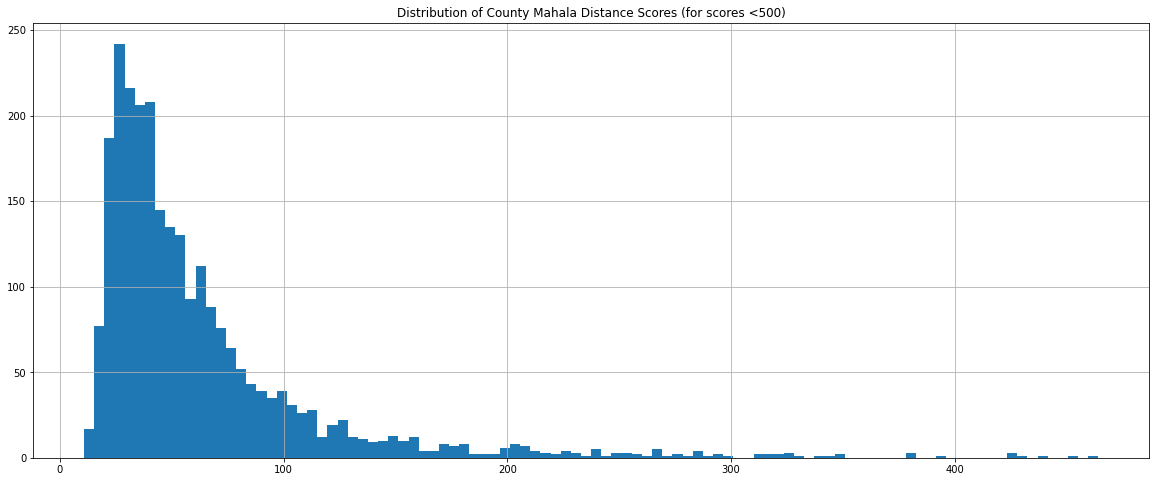

In [38]:
#df_x[(df_x.mahala > 40.00) & (df_x.mahala < 41.00)]

#df[(df.a != -1) & (df.b != -1)]

#df_x.hist(column='mahala', bins=500, figsize=(20,8))

df[df_x.mahala < 500.00].hist(column='mahala', bins=100, figsize=(20,8))
plt.title('Distribution of County Mahala Distance Scores (for scores <500)')


